<a href="https://colab.research.google.com/github/SallyHummran24/onlinefoods/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (2).csv


In [13]:
import io

df = pd.read_csv('/content/sample_data/heart.csv',encoding='unicode_escape')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


we will rename few coloumns

In [15]:
df.rename(columns={'chest pain type':'chest_pain_type','resting_bp_s ':'resting_bp_s ','fasting blood sugar':
'fasting_blood_sugar' , 'resting ecg': 'resting_ecg',' max heart rate':' max_heart_rate','exercise angina':'exercise_angina'},inplace=True)


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


colimns names` been changed
we will compare hwo feels more pain males or females

In [17]:
df['target'].value_counts(normalize=True)

target
1    0.528571
0    0.471429
Name: proportion, dtype: float64

Text(0, 0.5, 'frequency')

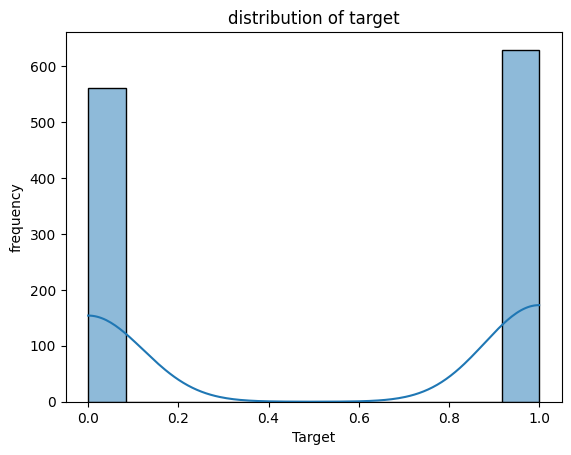

In [18]:
sns.histplot(data=df,x='target',kde='true')
plt.title('distribution of target')
plt.xlabel('Target')
plt.ylabel('frequency')


we notice that the best target to acheive is =0.1
which equlize to=550

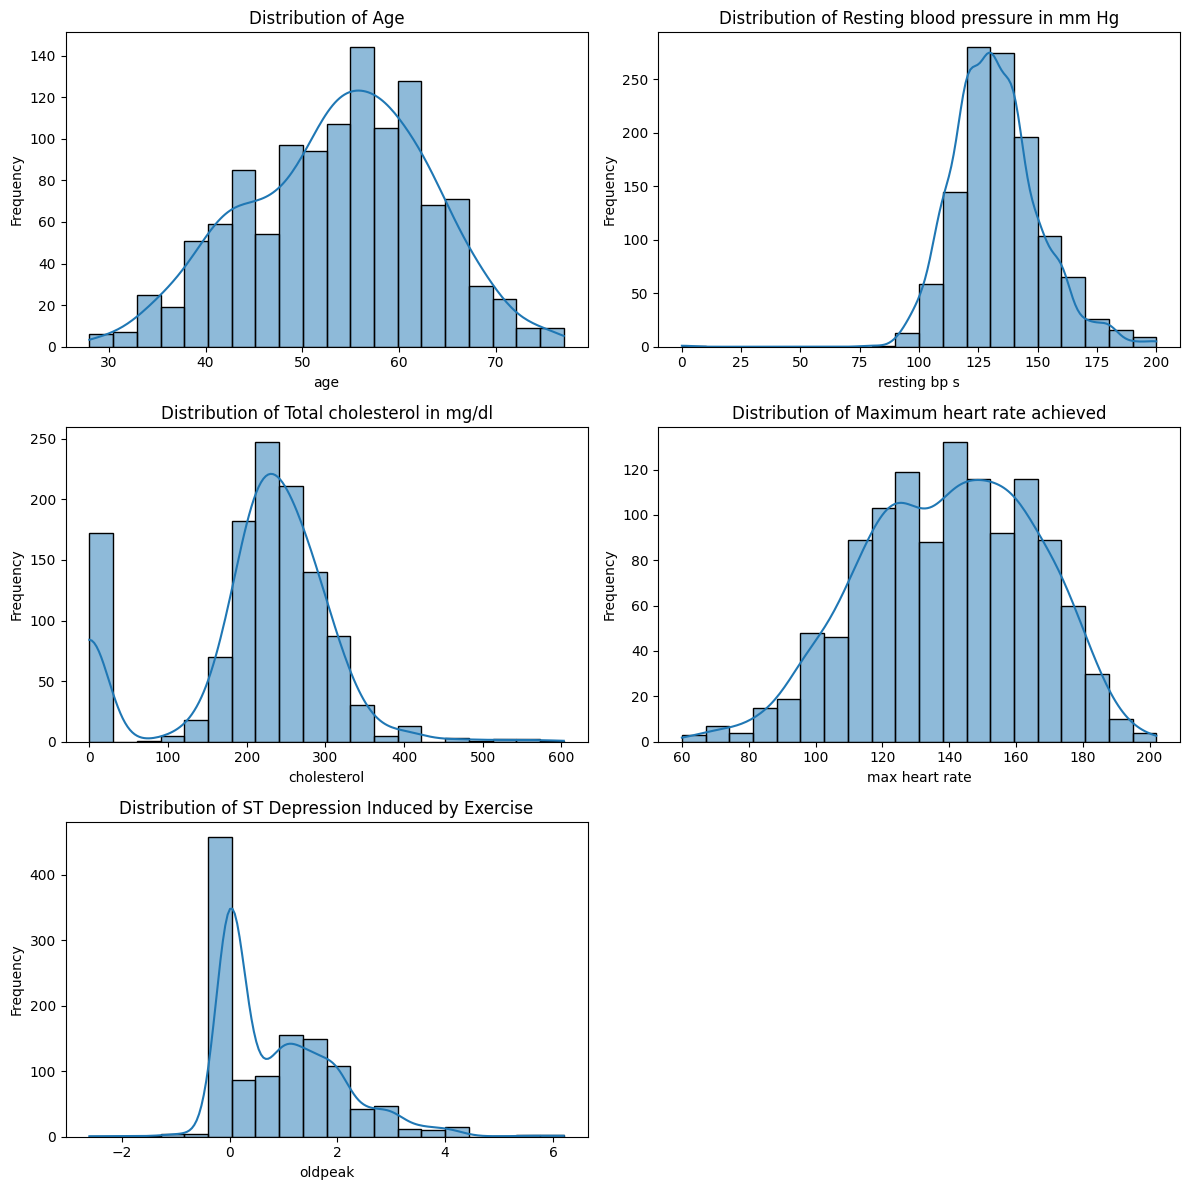

In [21]:
num_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
labels = ['Age', 'Resting blood pressure in mm Hg', 'Total cholesterol in mg/dl', 'Maximum heart rate achieved', 'ST Depression Induced by Exercise']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

# Iterate over each column for plotting its distribution using histplot
for i, (column, label) in enumerate(zip(num_columns, labels)):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {label}')

# Turn off the last axis
axes[-1].axis('off')
# Adjust layout
plt.tight_layout()
plt.show()

notice that the most affected age with heart disease is in between =60-50

the average resting pulse is in between= 110-50

the average cholestrol is in between= 200-300

the average resting pulse is in between= 110-50

the average max heart rate is in between= 145

**conclusion from above shapes**


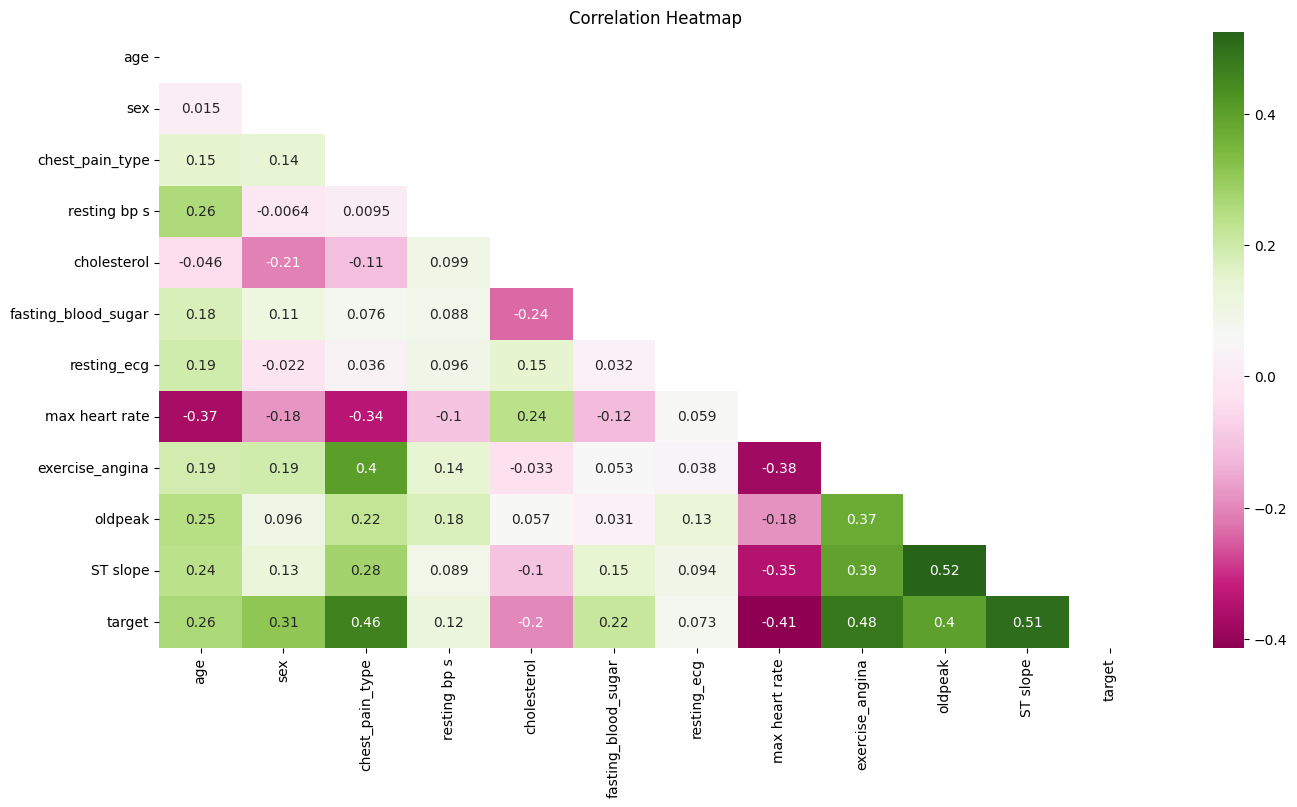

In [22]:
plt.figure(figsize=(16, 8))

# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with annotations
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, mask=mask)

# Set title for the plot
plt.title('Correlation Heatmap')

plt.show()



**Chest pain and target: ** is observed positive correlation, which makes sense: higher pain means higher risk to develop heart disease.
Target: Positively correlated with ST slope, oldpeak, and exercise angina, indicating their association with heart disease.


Max Heart Rate: Exhibits negative correlation with most columns, suggesting an inverse relationship with other variables.


Resting ECG, Resting BP S, Fasting Blood Sugar, Cholesterol: Show low correlation with all columns, implying weaker associations with the target variable and other features.


Oldpeak and ST Slope: Display the highest positive correlation (0.52), suggesting a moderate to strong relationship between these two variables.

**data Clean**

First, let's look at the percentage of rows with cholesterol equal to 0

In [23]:
round(sum(df['cholesterol'] == 0) / len(df) * 100, 1)

14.5

find how target values affected with 0 cholestrol

In [24]:
df[df['cholesterol'] == 0]['target'].value_counts()

target
1    152
0     20
Name: count, dtype: int64

In [25]:
df[df['cholesterol'] == 0]['target'].value_counts(normalize=True)

target
1    0.883721
0    0.116279
Name: proportion, dtype: float64

with cholestroll 88.4% have heart disease

 **Negative Oldpeak**

In [26]:
round(sum(df['oldpeak'] < 0) / len(df) * 100, 1)

1.1

these 1.1 percentage of negative oldpeak will be replaced with the averge

In [28]:
df['oldpeak'].describe()


count    1190.000000
mean        0.940084
std         1.065870
min         0.000000
25%         0.000000
50%         0.600000
75%         1.600000
max         6.200000
Name: oldpeak, dtype: float64

In [29]:
df[df < 0] = 0.6

now draw the heat map again after data clean

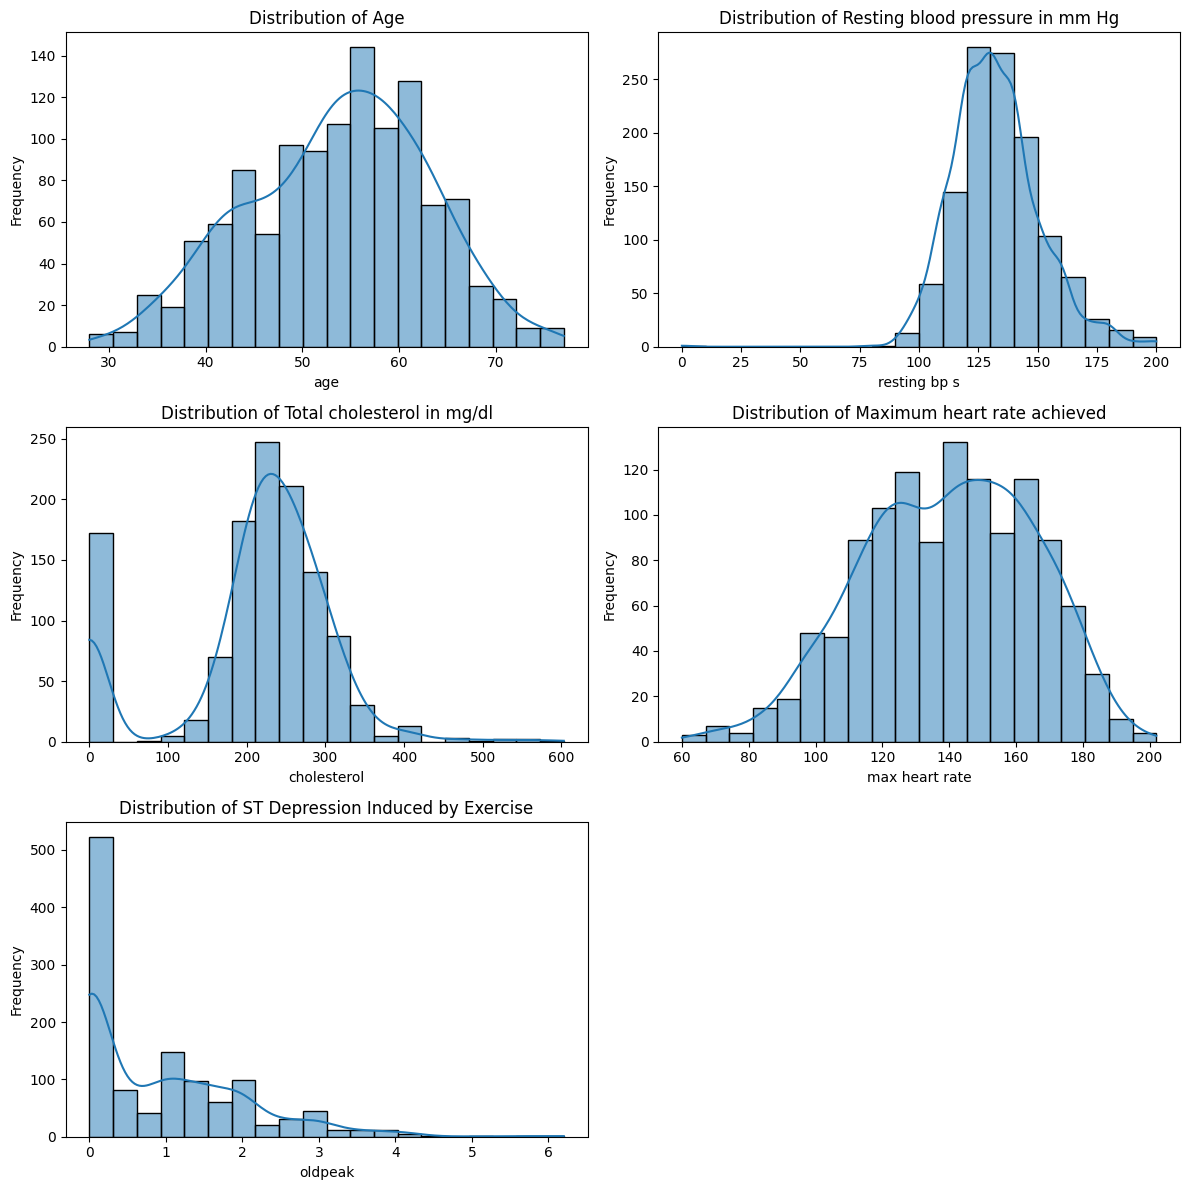

In [30]:
num_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
labels = ['Age', 'Resting blood pressure in mm Hg', 'Total cholesterol in mg/dl', 'Maximum heart rate achieved', 'ST Depression Induced by Exercise']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution using histplot
for i, (column, label) in enumerate(zip(num_columns, labels)):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {label}')

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

we notice that all previouse problems have been solved *italicized text*